# Recommendation System

I'm starting this project in order to develop my knowledge of recommendation systems. I already know that this is a very important field in machine learning, but I've never had direct practical contact with it, so after coming across a pain in my work and starting to think about how I could solve it, I came up with the idea of using a recommender system approach and this has a good chance of being a great solution to my problem. 

I started researching recommendations and how they work and saw how flexible they are, dealing with text obtained from user feedback, user scores on items and even clicks on products displayed in catalogs. I'm very excited to develop my first project, so I looked for a dataset on [Kaggle](https://www.kaggle.com/datasets/zynicide/wine-reviews?resource=download) to start applying the knowledge I'll learn.

---------
# 1. How to create a Recommendation System?

## 1.1 Why is this so usefull?

When you want to see a new movie on Netflix and you don't know exactly what you're going to see, then, when you search the catalog, you see that there's a "For you" section and that there are lots of movies, some you haven't seen yet, but there are others that you have seen, they may be on another site or channel, but the point is that you've seen them and you really liked them!

Or when you don't know which book you're going to read next and Amazon recommends a book you've never seen and that suits you.

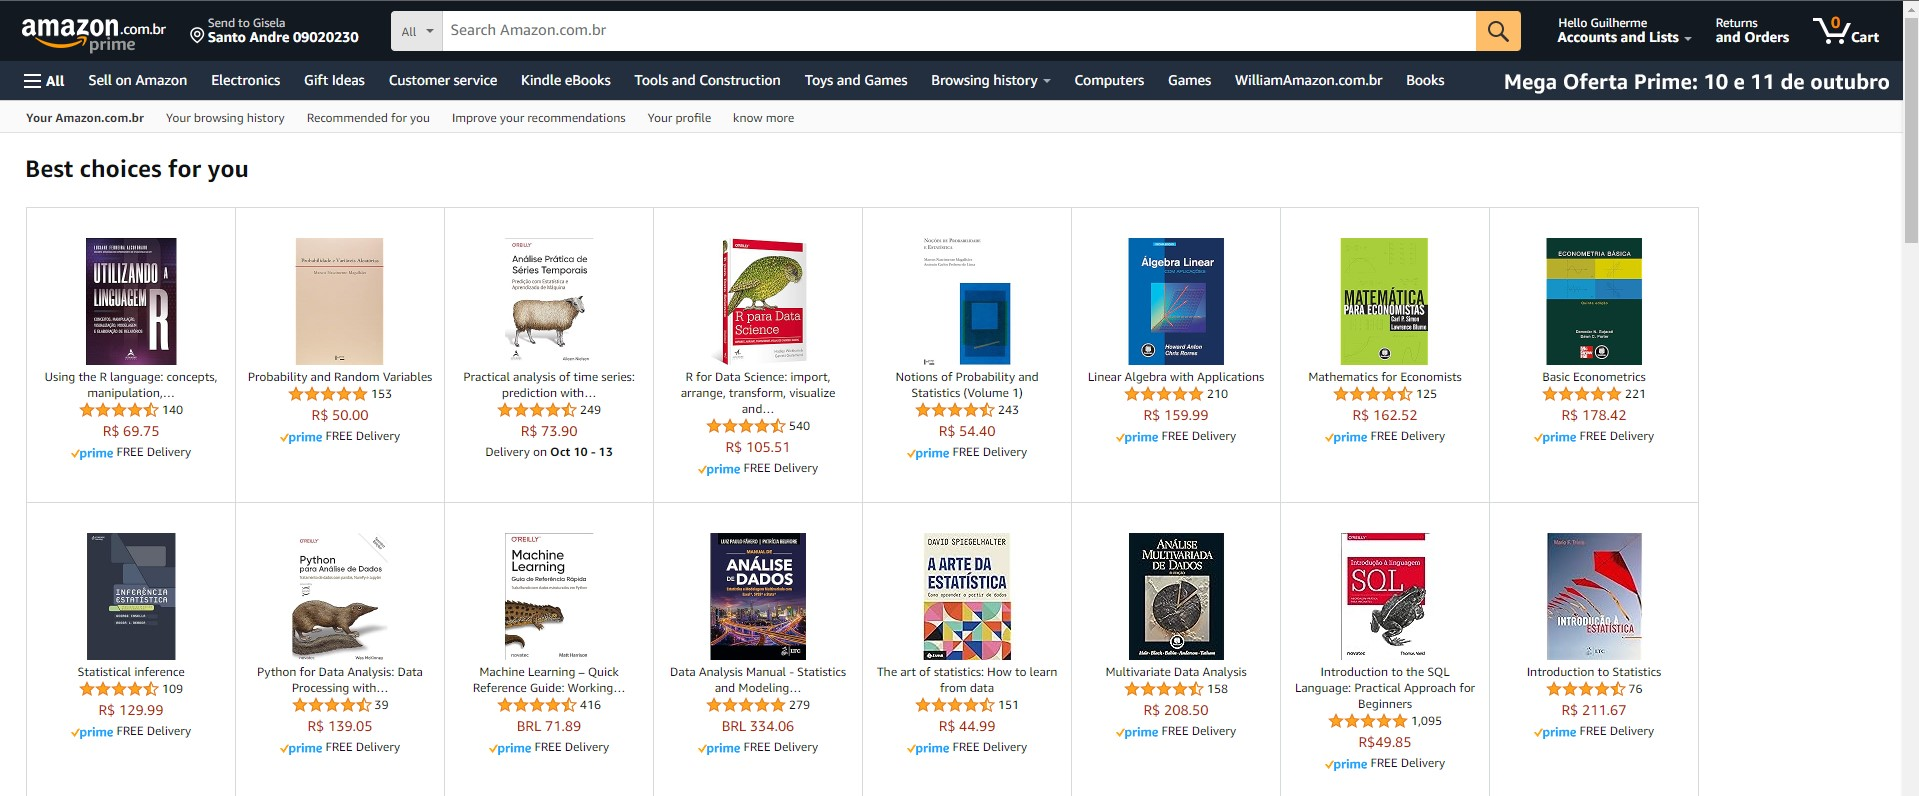

That's a recommendation system! With a bit of mathematics to recognize our patterns, a machine learning model can help us speed up our searches.

## 1.2 How this works?
The aim here is to move away from the dimensions of users (U) and items (I) to bring in another dimension (R) which refers to the rating that this user could give to the item.

$$u: U \cdot I\rightarrow R$$

With this in mind, our mission is to complete all the combinations of users and items (in mathematics the matrix (UxI)) the blank spaces in this matrix

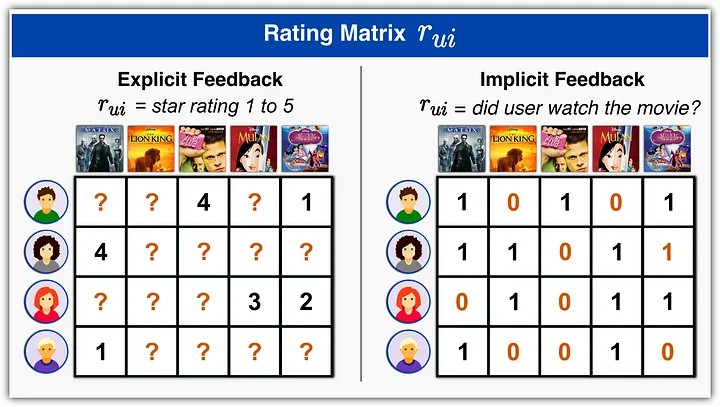

## 1.3 Key Problems
### I - Gathering the "know" ratings for the matrix
#### Explicit - when we get thes users rating for the item

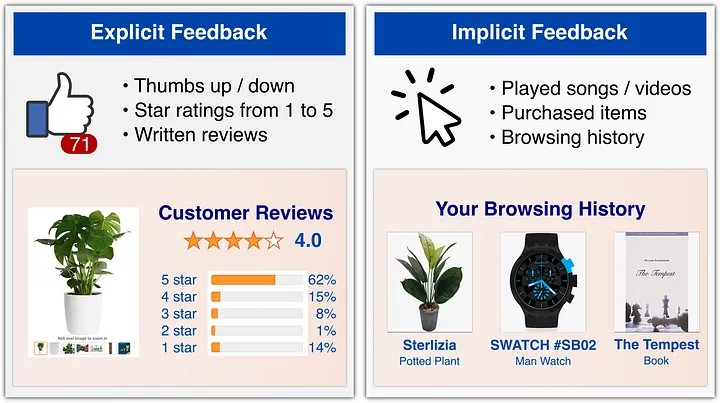

> Hardly anyone rates anything

#### Implicit - when we don't have the rating, but use purchases, clicks, time on site to measure interest
> It's hard to measure the not interest

### II - Extrapolate unknown ratings from the known ones
> Big problem: R matrix is very sparse, because, as mentioned above, hardly anyone rates anything
> 
> Cold Start: new users and new items have no ratings in the history


#### Three approachs to Recommendation Systems
##### > <span style="color:cornflowerblue">Content-Based</span>
##### > <span style="color:cornflowerblue">Collaborative Filtering</span>
##### > <span style="color:cornflowerblue">Latent Factor Based </spa

### III - Evaluating extrapolating methods

---------
# Content-Based x Collaborative Filtering

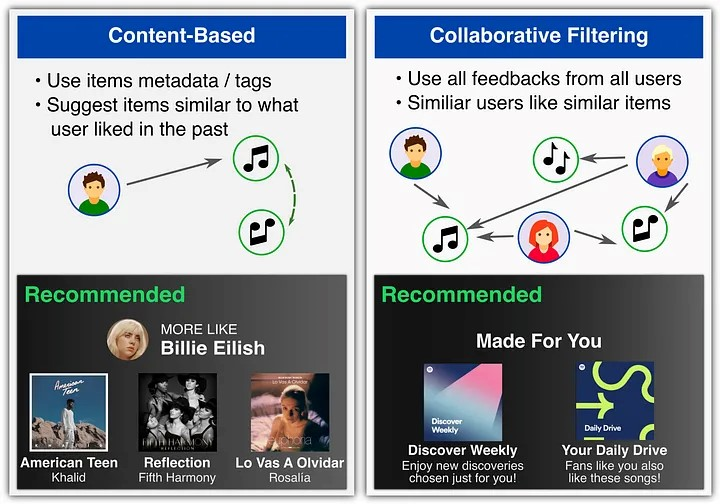

## 1. Content-Based

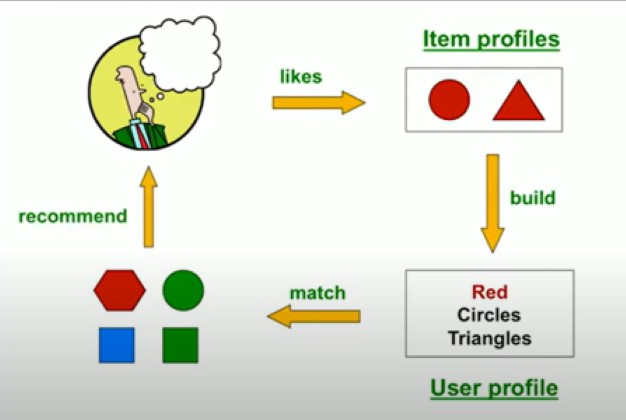

The goal here is to create new ratings or items based on the history ratings of the user, so if him like circles, triangles and red thinks, we search similar features in our database and recommend it.

> For each item, create a item profile
> 
> Profile is a set of features, like to a movie: author, actors, title, ...
>
> We can visualize it as a vector

### <span style="color:cornflowerblue">Pros</span>
+ No need for data on other users
+ Able to recommend to users with unique tastes
+ Able to recommend new & unpopular items
    + No first-rater problem
+ Explanation for recommended items
    + Content features that caused an item to be recommended

### <span style="color:salmon">Cons</span>
+ Finding the appropriate features is hard
+ Overspecialization
    + Never recommends items outside user's content profile
    + People might have multiple interests
    + Unable to exploit quality judgments of other users
+ Cold-start problem for new users

## 2. Collaborative Filtering

Image('images/collaborative.png', width=600, height=300)

> Consider user __x__
>
> Find __N__ of others users whose ratings <span style="color:salmon">"similar"</span> to x's rating
> 
> Estimate __x__'s ratings based on ratings of user __N__

### But how can  we calculate the __similarity__?

The most common approach is to use __Cosine and Centerd Cosine Similarity__, let's check what this is.

---------
### Cosine Similarity / Centered Cosine Similarity

<span style="font-size:20px"> $$U(x,i)=cos(\theta)=\frac{(x\cdot i)}{(||x||\cdot ||i||)}$$ </span>

> This is a key tool to help us understand how these items ratings is similar in a high dimension space.
> Greater values refer to greater similarity

#### In python...

In [8]:
import pandas as pd
import numpy as np

In [9]:
cosine_similarity = lambda A, B: np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B))

In [10]:
df_example = pd.DataFrame(
    {
        'Book1': [4,5,np.nan,np.nan],
        'Book2': [np.nan,5,np.nan,3],
        'Book3': [np.nan,4,np.nan,np.nan],
        'Book4': [5,np.nan,2,np.nan],
        'Book5': [1,np.nan,4,np.nan],
        'Book6': [np.nan,np.nan,5,np.nan],
        'Book7': [np.nan,np.nan,np.nan,3],
    }, index = ['u1', 'u2', 'u3', 'u4'])

In [11]:
df_example

,Book1,Book2,Book3,Book4,Book5,Book6,Book7
u1,4.0,NaN,NaN,5.0,1.0,NaN,NaN
u2,5.0,5.0,4.0,NaN,NaN,NaN,NaN
u3,NaN,NaN,NaN,2.0,4.0,5.0,NaN
u4,NaN,3.0,NaN,NaN,NaN,NaN,3.0


But we need to fill this blank spaces to do the math, one approach is to fill this with 0's, let's check how this goes. 

Let focus on users 1, 2 and 3.

> The users 1 and 2 have only seen 1 movie in common, and the ratings is so close, but useus 1 and 3 seen 2 movies in common and diverge about the rating.

In [12]:
df_example_fill0 = df_example.fillna(0)
cosine_similarity_u1_u2 = cosine_similarity(df_example_fill0.loc['u1'], df_example_fill0.loc['u2'])
cosine_similarity_u1_u3 = cosine_similarity(df_example_fill0.loc['u1'], df_example_fill0.loc['u3'])

print(f'Cosine Similarity (u1, u2): {cosine_similarity_u1_u2}')
print(f'Cosine Similarity (u1, u3): {cosine_similarity_u1_u3}')

Cosine Similarity (u1, u2): 0.3798685881987931
Cosine Similarity (u1, u3): 0.3220305943597653


The result is as expected, u1 and u2 are more similar than u1 and u3. But the values are close, this is because we filled in the blanks with 0s, and that's like hating the movie.

Then we need to centered the mean, to avoid the problem mentioned above, so to do that one approach is:
+ Calculate the row mean
+ Subtract every value to the mean
+ Calculate cosine similarity

In [13]:
df_example_centerd = df_example.copy()
row_means = df_example_centerd.mean(axis=1)

In [14]:
row_means

u1    3.333333
u2    4.666667
u3    3.666667
u4    3.000000
dtype: float64

In [15]:
df_example_centerd = df_example_centerd.subtract(row_means, axis='rows')
df_example_centerd

,Book1,Book2,Book3,Book4,Book5,Book6,Book7
u1,0.666667,NaN,NaN,1.666667,-2.333333,NaN,NaN
u2,0.333333,0.333333,-0.666667,NaN,NaN,NaN,NaN
u3,NaN,NaN,NaN,-1.666667,0.333333,1.333333,NaN
u4,NaN,0.000000,NaN,NaN,NaN,NaN,0.0


In [16]:
np.round(df_example_centerd.mean(axis=1), 5)

u1   -0.0
u2   -0.0
u3    0.0
u4    0.0
dtype: float64

>Now the 0 is the mean and we can fill the nulls with 0.

In [17]:
df_example_centerd = df_example_centerd.fillna(0)

In [18]:
cosine_similarity_u1_u2 = cosine_similarity(df_example_centerd.loc['u1'], df_example_centerd.loc['u2'])
cosine_similarity_u1_u3 = cosine_similarity(df_example_centerd.loc['u1'], df_example_centerd.loc['u3'])

print(f'Cosine Centered Similarity (u1, u2): {cosine_similarity_u1_u2:.2f}')
print(f'Cosine Centered Similarity (u1, u3): {cosine_similarity_u1_u3:.2f}')

Cosine Centered Similarity (u1, u2): 0.09
Cosine Centered Similarity (u1, u3): -0.56


Now it's make more sense, the difference is so much bigger!

--------
## Rating Predictions

+ Let $r_x$ the vector of user's x rating
+ Let $N$ the set of $k$ users most simmilar to $x$ (the neighborhood) how have also rated item $i$
+ Prediction for user $x$ and item $i$

+ <span style="color:cornflowerblue"> __Option 1__ : Average </span>  <span style="font-size:25px"> $\longrightarrow r_{ui}=\frac{\sum_{y \in N} r_{yi}}{k}$ </span>

+ <span style="color:cornflowerblue"> __Option 2__ : Weighted Average </span>  <span style="font-size:25px"> $\longrightarrow r_{ui}=\frac{\sum_{y \in N} s_{xy} r_{yi}}{\sum_{y \in N} s_{xy}}$ </span>
    + Where <span style="font-size:15px"> $s_{xy} = sim(x,y)$ </span>


### Item-Item Collaborative Filtering
> So far: <span style="color:salmon"> User-User Collaborative Filtering </span>

> Another view: __Item-Item__
> + For item $i$, find other similar items
> + Estimate reatings for item $i$ based on ratings of similar items
> + Can use same similarity metrics and prediction function as <span style="color:salmon"> User-User Collaborative Filtering </span>

> __Items is more "simpler" than users to measure similarity, because one pearson can be ecletic but a book not.__

## Pros & Cons Collaborative Filtering
### <span style="color:cornflowerblue">Pros</span>
+ Work for any kind of item
    + No feature selection needed

### <span style="color:salmon">Cons</span>
+ Cold Start
    + Need enough users on the system to recommend an item
+ Sparcity
    + The matrix users/ratings is sparse
    + Hard to find users that rated the same items
+ Canot recommend an unrated item
+ Tends to recommend popular items

## 3. Hybrid Methods

### Global Baseline Estimate

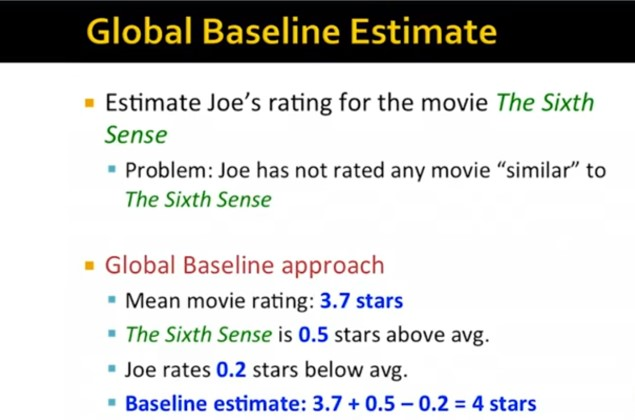

### Global Baseline Estimate + Collaborative Filtering
+ Calculate the __Global Baseline Estimate__ as mentione above
+ Local Neighborhood (__CF/NN__)
    + Ex: Joe didn't like related movie <span style="color:Chocolate"> Signs </span>
    + Rated it <span style="color:Chocolate"> 1 star </span> bellow his average rating
+ Final Estimation
    +  Joe will rating the <span style="color:Salmon"> ___The Six Sense:___ 4 - 1 = 3 stars</span>

## CF: Common Practice
+ Define <span style="color:salmon"> __similarity__ </span> <span style="color:LightSlateGray"> $s_{ij}$ </span> of items ___i___ and ___j___
+ Select ___k___ nearest neighbors <span style="color:LightSlateGray"> $N(i;x)$ </span>
    > + Items most similar to ___i___, that were rated by ___x___
+ Estimate rating  <span style="color:LightSlateGray"> $r_{xi}$ </span> as the weighted average:

<span style="font-size:25px">  $r_{xi}=b_{xi} + \frac{\sum_{y \in N(i;x)} s_{ij} \cdot (r_{xj}-b_{xj})}{\sum_{y \in N(i;x)} s_{ij}}$ </span>

<span style="color:cornflowerblue; font-size:15px">  $b_{xi}=\mu + b_x + b_i$ </span>

> <span style="color:cornflowerblue; font-size:15px">  $\mu$ = overall mean book rating </span>
> 
> <span style="color:cornflowerblue; font-size:15px">  $b_x$ = rating deviation of user ___x___ = (avg. rating of user ___x___ - $\mu$</span>
> 
> <span style="color:cornflowerblue; font-size:15px">  $b_i$ = rating deviation of book ___i___ </span> 

------
## Evaluation Recommendation System


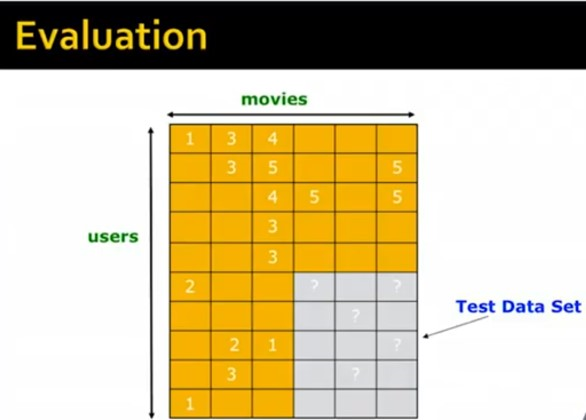

+ Compare system prediction against wihtheld know ratings (test set __T__)
+ Root Mean Squared Error
 
<span style="font-size:25px">  $RMSE=\sqrt{\frac{\sum_{(x,i) \in T} (r_{xi}-r^*_{xi})^2}{N}}$ </span> 

---------
## ___References___:
___[Overview of Recommender Systems | Stanford University](https://www.youtube.com/watch?v=1JRrCEgiyHM)___

___[Content Based Recommendations | Stanford University](https://www.youtube.com/watch?v=2uxXPzm-7FY)___

___[Collaborative Filtering | Stanford University](https://www.youtube.com/watch?v=h9gpufJFF-0)___

___[Implementing Collaborative Filtering (Advanced) | Stanford University](https://www.youtube.com/watch?v=6BTLobS7AU8)___

___[Evaluating Recommender Systems | Stanford University](https://www.youtube.com/watch?v=VZKMyTaLI00)___

___[Collaborative Filtering : Data Science Concepts | ritvikmath](https://www.youtube.com/watch?v=Fmtorg_dmM0)___

___[Recommender Systems — A Complete Guide to Machine Learning Models | Francesco Casalegno](https://towardsdatascience.com/recommender-systems-a-complete-guide-to-machine-learning-models-96d3f94ea748)___

___[On the Role of Reviewer Expertise in Temporal Review Helpfulness Predictio | Mir Tafseer Nayeem & Davood Rafiein](https://aclanthology.org/2023.findings-eacl.125.pdf)___